In [40]:
import os, sys
import h5py
import numpy as np

import matplotlib.pyplot as plt

import logging


save_dir_name = 'var4d_defVars'
#save_dir_name = 'climaX_ObsNoise_randLocs'
#diffs = np.load('../data/climaX_ObsNoise_randLocs/diffs.npy')

save_dir = '/eagle/MDClimSim/mjp5595/data/{}/'.format(save_dir_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

#filepath = "/eagle/MDClimSim/awikner/irga_1415_test1_obs.hdf5" # Old Observations
#filepath = "/eagle/MDClimSim/mjp5595/ml4dvar/igra_141520_stormer_obs_standardized.hdf5"
#filepath = "/eagle/MDClimSim/mjp5595/ml4dvar/igra_141520_stormer_obs_standardized_360.hdf5"
filepath = "/eagle/MDClimSim/mjp5595/ml4dvar/igra_141520_stormer_obs_standardized_360_2.hdf5"

means = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')

background_file_np = '/eagle/MDClimSim/mjp5595/ml4dvar/background_starter.npy' # This is just to initialize the model background

from vars_climaX import vars_climaX
vars_climax = vars_climaX().vars_climax

background_f = np.load(background_file_np, 'r')
print('background_f.shape :',background_f.shape)

noise_levels = [0, 0.01, 0.1, 1, 10, 100, 1000]

background_f.shape : (1, 82, 128, 256)


In [41]:
def unstandardizeForecast(forecast, means=None, stds=None, climax_vars=None):
    if means is None:
        raise ValueError('Means is not defined and has not been input.')
    if stds is None:
        raise ValueError('Stds is not defined and has not been input.')
    if means is not None:
        means_array = np.zeros(len(climax_vars))
        for i, var in enumerate(climax_vars):
            val = means[var][0]
            means_array[i] = val
        means = means_array
    if stds is not None:
        stds_array = np.zeros(len(climax_vars))
        for i, var in enumerate(climax_vars):
            stds_array[i] = stds[var][0]
        stds = stds_array
    #forecasts_unstandardized = forecasts * stds.reshape(1, 1, -1, 1, 1) + \
    #                           means.reshape(1, 1, -1, 1, 1)
    # forecasts -> (forecast_steps,vars,lat,lon)
    forecasts_unstandardized = np.zeros_like(forecast)
    for i in range(len(means)):
        forecasts_unstandardized[i,:,:] = forecast[i,:,:] * stds[i]
        forecasts_unstandardized[i,:,:] = forecasts_unstandardized[i,:,:] + means[i]
    return forecasts_unstandardized

Text(0.5, 0.98, 'Forecasts for each cycle (from DA)')

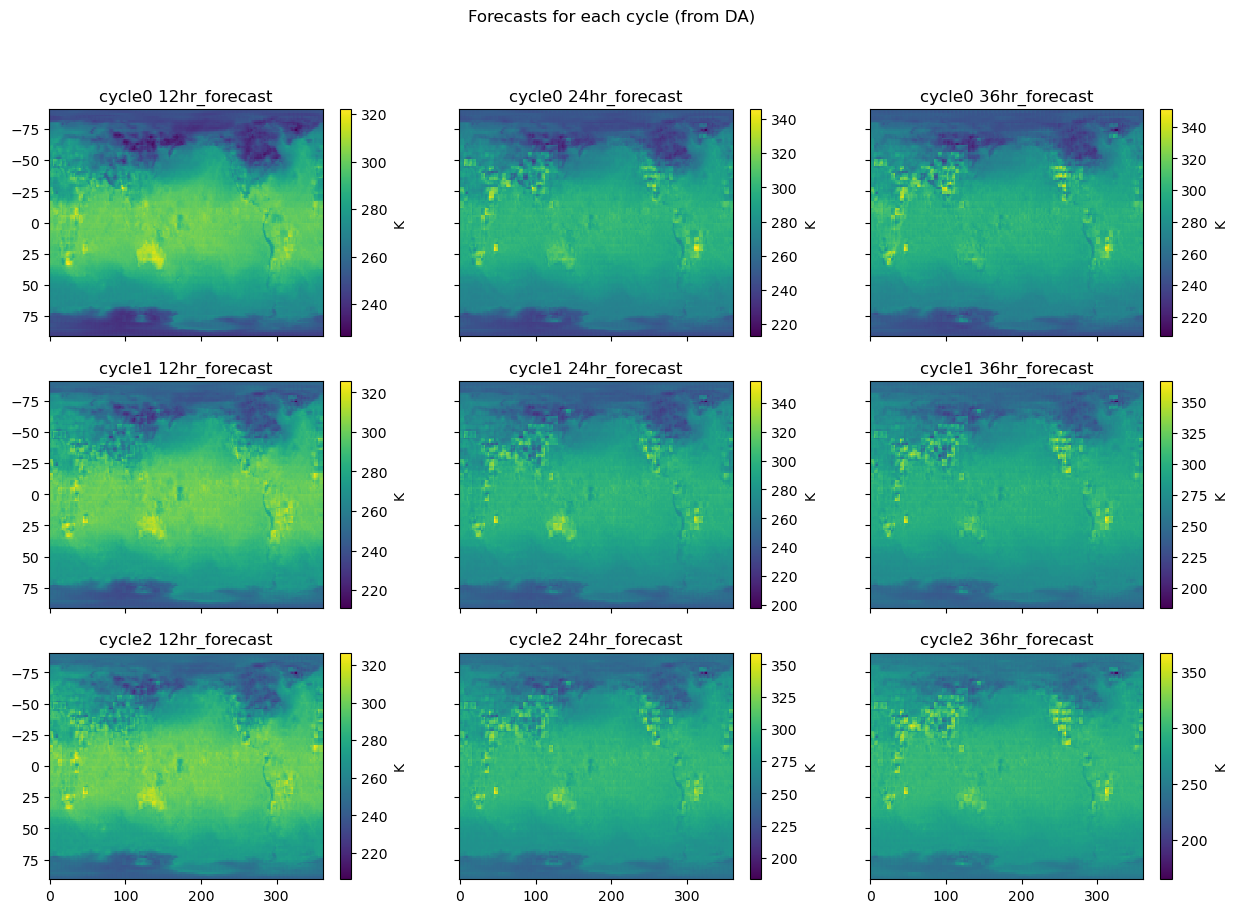

In [42]:
from matplotlib import colors
from matplotlib import cm

means = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')

# Plotting the results
forecast_step = 2
lon = np.linspace(0,360,256)
lat = np.linspace(90,-90,128)


hf0 = h5py.File(os.path.join(save_dir, 'forecasts_0_1201012014.h5'),'r')
hf1 = h5py.File(os.path.join(save_dir, 'forecasts_1_0001022014.h5'),'r')
hf2 = h5py.File(os.path.join(save_dir, 'forecasts_2_1201022014.h5'),'r')
plots = []

# Get original forecast
fig, axs = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (15,10))
axs[0,0].invert_yaxis()
for i in range(3):
    forecast = unstandardizeForecast(hf0[str(2*i)],means=means,stds=stds,climax_vars=vars_climax)
    plots.append(axs[0, i].pcolormesh(lon,lat,forecast[0],cmap='viridis'))
    plt.colorbar(plots[-1], ax = axs[0,i], label='K')
    axs[0, i].set_title('cycle{} {}hr_forecast'.format(0,12*(i+1)))

for i in range(3):
    forecast = unstandardizeForecast(hf1[str(2*i)],means=means,stds=stds,climax_vars=vars_climax)
    plots.append(axs[1, i].pcolormesh(lon,lat,forecast[0],cmap='viridis'))
    plt.colorbar(plots[-1], ax = axs[1,i], label='K')
    axs[1, i].set_title('cycle{} {}hr_forecast'.format(1,12*(i+1)))

for i in range(3):
    forecast = unstandardizeForecast(hf2[str(2*i)],means=means,stds=stds,climax_vars=vars_climax)
    plots.append(axs[2, i].pcolormesh(lon,lat,forecast[0],cmap='viridis'))
    plt.colorbar(plots[-1], ax = axs[2,i], label='K')
    axs[2, i].set_title('cycle{} {}hr_forecast'.format(2,12*(i+1)))

plt.suptitle('Forecasts for each cycle (from DA)')

#plt.savefig('../data/climaX_ObsNoise/perturb_sameCMap.png')



Text(0.5, 0.98, 'Forecasts for each cycle (from background)')

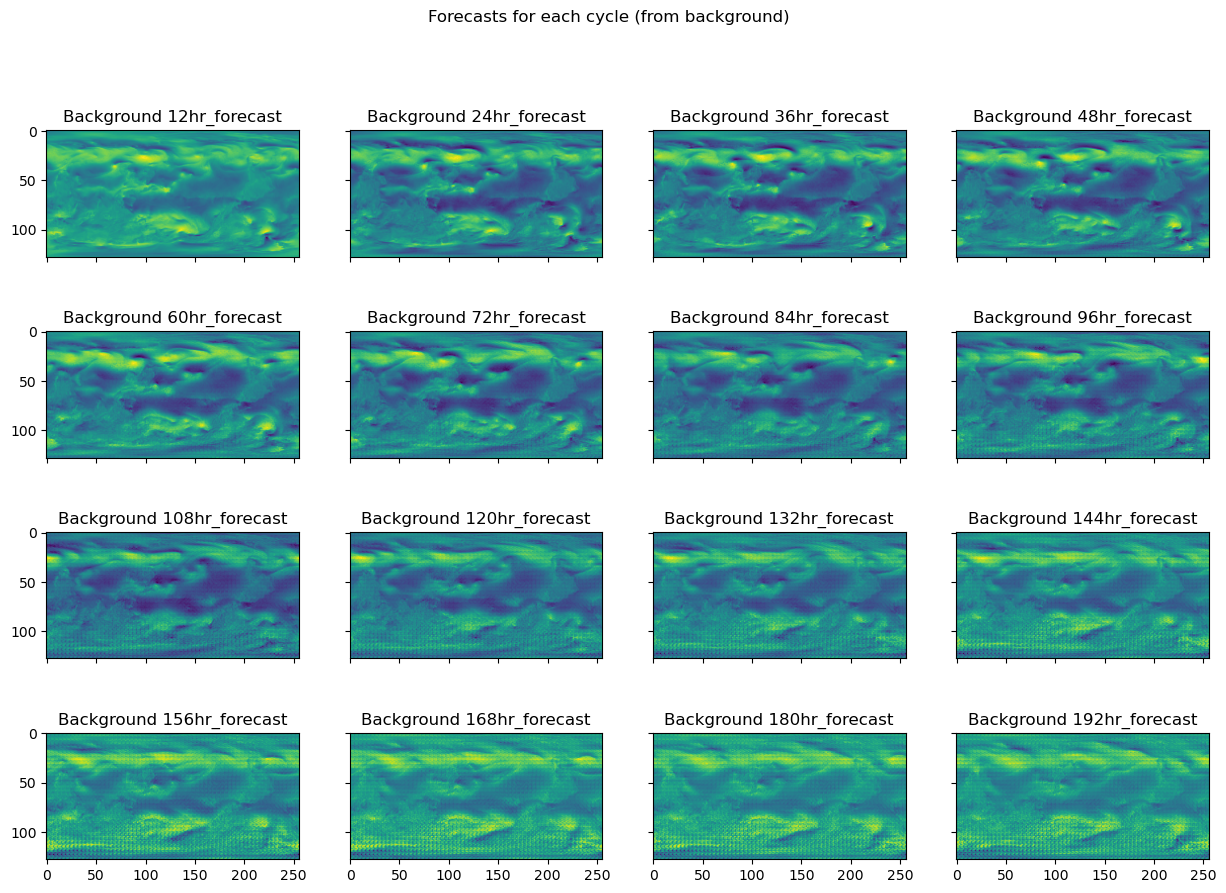

In [45]:
from matplotlib import colors
from matplotlib import cm


save_dir_name = 'climaX_defVars_noNoise'
save_dir = '/eagle/MDClimSim/mjp5595/data/{}/'.format(save_dir_name)

means = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')

# Plotting the results
forecast_step = 2
lon = np.linspace(0,360,256)
lat = np.linspace(90,-90,128)


hf0 = h5py.File(os.path.join(save_dir, 'forecast_noise0.h5'),'r')
vmin = 1000
vmax = 0
for num in range(16):
    i = num // 4
    j = num % 4
    forecast = unstandardizeForecast(hf0[str(2*num)],means=means,stds=stds,climax_vars=vars_climax)
    vmin = min(np.min(forecast[0]),vmin)
    vmax = max(np.max(forecast[0]),vmax)

fig, axs = plt.subplots(4, 4, sharex = True, sharey = True, figsize = (15,10))
axs[0,0].invert_yaxis()
plots = []
for num in range(16):
    i = num // 4
    j = num % 4
    forecast = unstandardizeForecast(hf0[str(2*num)],means=means,stds=stds,climax_vars=vars_climax)
    #plots.append(axs[i, j].pcolormesh(lon,lat,forecast[0],vmin=vmin,vmax=vmax,cmap='viridis'))
    #plots.append(axs[i, j].pcolormesh(lon,lat,forecast[0],cmap='viridis'))
    plots.append(axs[i, j].imshow(forecast[1],cmap='viridis'))
    #plt.colorbar(plots[-1], ax = axs[i,j], label='K')
    axs[i, j].set_title('Background {}hr_forecast'.format(12*(num+1)))

plt.suptitle('Forecasts for each cycle (from background)')

#plt.savefig('../data/climaX_ObsNoise/perturb_sameCMap.png')



Text(0.5, 1.0, 'Background 6hr_forecast u10')

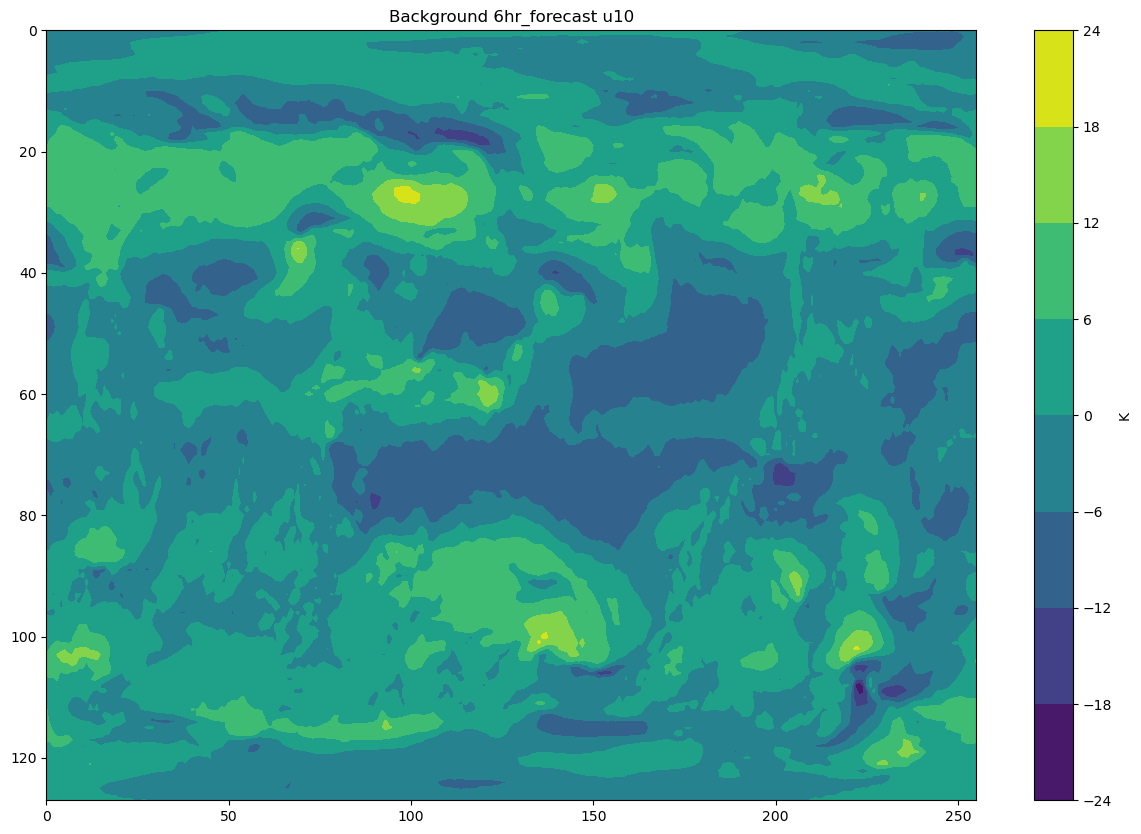

In [39]:
from matplotlib import colors
from matplotlib import cm


save_dir_name = 'climaX_defVars_noNoise'
save_dir = '/eagle/MDClimSim/mjp5595/data/{}/'.format(save_dir_name)

means = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')

# Plotting the results
forecast_step = 2
lon = np.linspace(0,360,256)
lat = np.linspace(90,-90,128)


hf0 = h5py.File(os.path.join(save_dir, 'forecast_noise0.h5'),'r')
vmin = 1000
vmax = 0
for num in range(16):
    i = num // 4
    j = num % 4
    forecast = unstandardizeForecast(hf0[str(2*num)],means=means,stds=stds,climax_vars=vars_climax)
    vmin = min(np.min(forecast[0]),vmin)
    vmax = max(np.max(forecast[0]),vmax)

#fig, axs = plt.subplots(4, 4, sharex = True, sharey = True, figsize = (15,10))
fig, axs = plt.subplots(1, 1, sharex = True, sharey = True, figsize = (15,10))
axs.invert_yaxis()
plots = []
forecast = unstandardizeForecast(hf0[str(0)],means=means,stds=stds,climax_vars=vars_climax)
#plots.append(axs[i, j].pcolormesh(lon,lat,forecast[0],vmin=vmin,vmax=vmax,cmap='viridis'))
plots.append(axs.contourf(forecast[1],cmap='viridis'))
plt.colorbar(plots[-1], ax = axs, label='K')
#axs.set_title('Background {}hr_forecast'.format(12*(num+1)))
axs.set_title('Background 6hr_forecast u10')

#plt.suptitle('Forecasts for each cycle (from background)')

